# FFT explicación

[You can read this post in English](./FFT_english.ipynb)

El objetivo de esta página es explicar todos los pormenores de las FFTs, desde cómo se crean, como afecta el número de muestras a la FFT o la forma de esta ventana. Además, de otro tipo de conceptos.

El objectivo de hacerlo en un fichero en formato Jupyter es para que cualquiera que lo necesite pueda utilizarlo para aprender a utilizar una FFT en Python. Para analizarlo se puede utilizar o el entorno de Jupyter Notebook o el Visual Studio Code con la extensión de Jupyter Notebook.

## Diagrama de FFT

Las FFTs están principalmente en la librería Scipy de Python. Para instalar la librería solo se necesita ejecutar el siguiente comando.

In [ ]:
pip install scipy numpy

In [4]:
# modelo de FFT básico

### ¿Qué es una FFT?
Una FFT es la representación en el dominio de la frecuencia de una señal.

NOTA: Hay que distinguir entre los siguientes términos:
- FFT: (Fast Fourier Transform) Transformada rápida de Fourier.
- DFT: (Discrete Fourier Transform) Transforma discreta de Fourier.
- DTFT: (Discrete Time Fourier Transform) Transformada discreta de Fourier en el tiempo.
- STFT: (Short Time Fourier Transform) Transformada corta de Fourier en el tiempo.

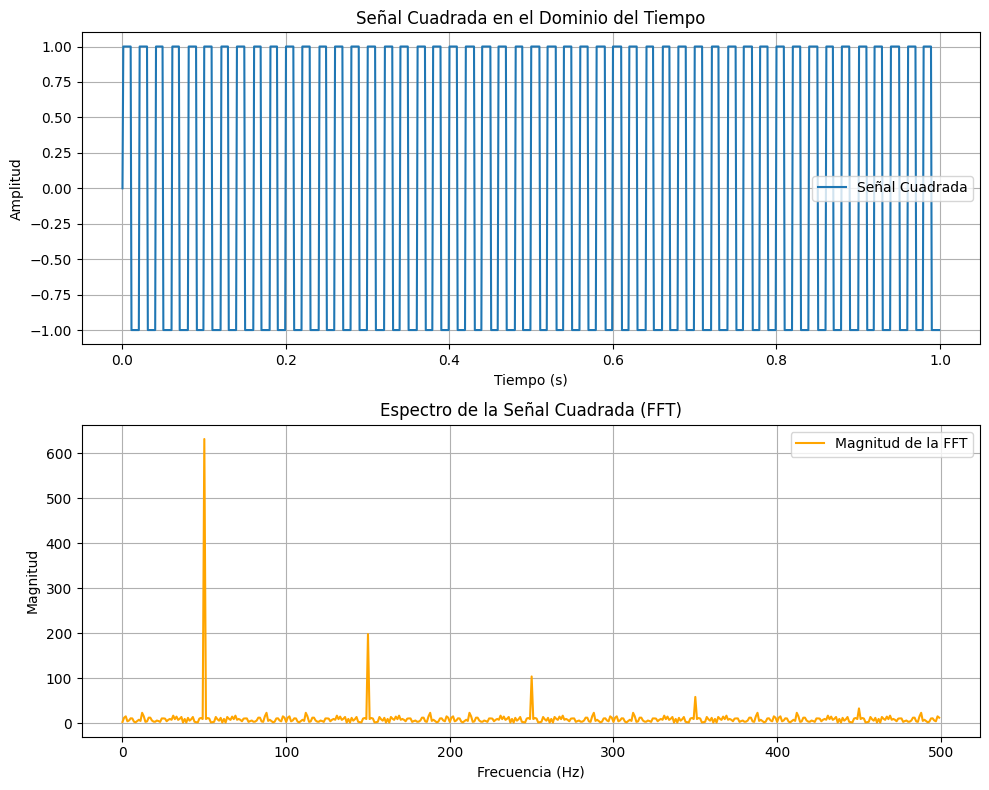

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
T = 1  # Duración de la señal en segundos
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Tiempo

# Generamos la señal cuadrada de 50 Hz
f_square = 50  # Frecuencia de la señal cuadrada en Hz
square_signal = np.sign(np.sin(2 * np.pi * f_square * t))  # Señal cuadrada

# Calculamos la FFT de la señal cuadrada utilizando scipy.fft
square_FFT = fft(square_signal)
frequencies = fftfreq(len(t), 1/fs)

# Tomamos solo la mitad positiva de la FFT (espectro simétrico)
positive_freqs = frequencies[:len(frequencies)//2]
square_FFT_mag = np.abs(square_FFT)[:len(frequencies)//2]

# Graficamos la señal cuadrada y su espectro de frecuencias
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Señal cuadrada en el dominio del tiempo
axs[0].plot(t, square_signal, label="Señal Cuadrada")
axs[0].set_title("Señal Cuadrada en el Dominio del Tiempo")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].grid(True)
axs[0].legend()

# Espectro de la FFT (frecuencia vs magnitud)
axs[1].plot(positive_freqs, square_FFT_mag, label="Magnitud de la FFT", color='orange')
axs[1].set_title("Espectro de la Señal Cuadrada (FFT)")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


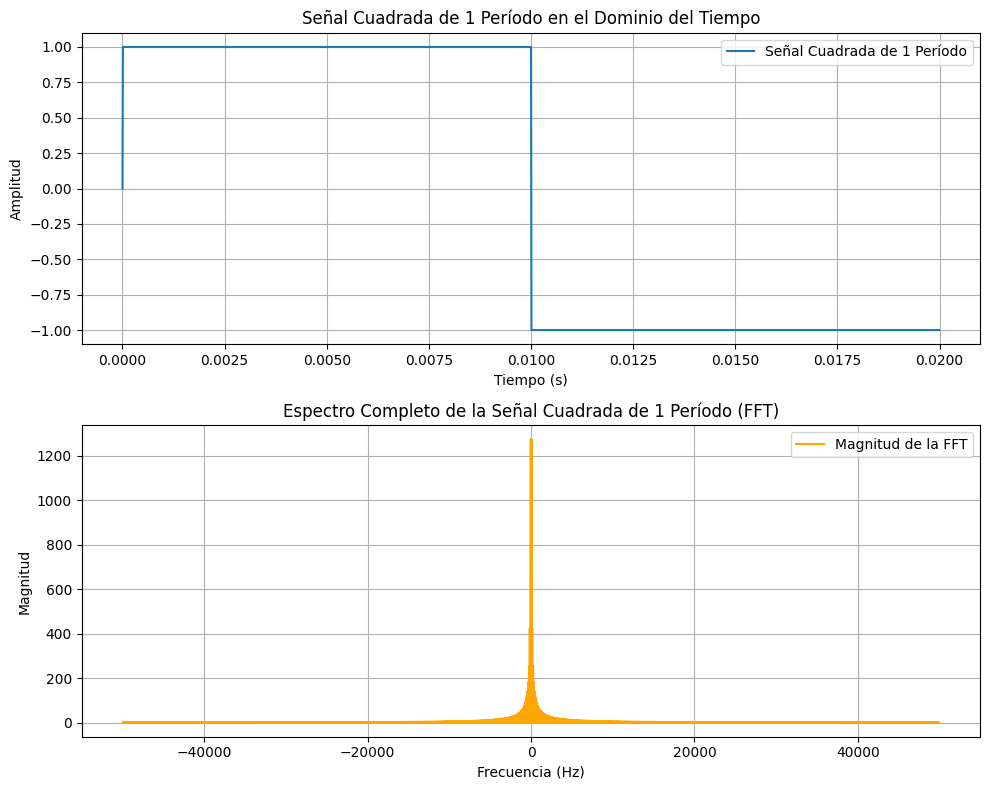

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
f_square = 50  # Frecuencia de la señal cuadrada en Hz
T_square = 1 / f_square  # Período de la señal cuadrada en segundos
fs = 100000  # Frecuencia de muestreo alta para mayor precisión (10 kHz)

# Generamos el tiempo para 1 período de la señal con mayor resolución
t = np.linspace(0, T_square, int(fs * T_square), endpoint=False)

# Generamos la señal cuadrada de 1 período
square_signal = np.sign(np.sin(2 * np.pi * f_square * t))  # Señal cuadrada

# Calculamos la FFT de la señal cuadrada
square_FFT = fft(square_signal)
frequencies = fftfreq(len(t), 1/fs)

# Graficamos la señal cuadrada y su espectro de frecuencias (positivo y negativo)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Señal cuadrada en el dominio del tiempo
axs[0].plot(t, square_signal, label="Señal Cuadrada de 1 Período")
axs[0].set_title("Señal Cuadrada de 1 Período en el Dominio del Tiempo")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].grid(True)
axs[0].legend()

# Espectro de la FFT (frecuencia vs magnitud), completo (positivo y negativo)
axs[1].plot(frequencies, np.abs(square_FFT), label="Magnitud de la FFT", color='orange')
axs[1].set_title("Espectro Completo de la Señal Cuadrada de 1 Período (FFT)")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


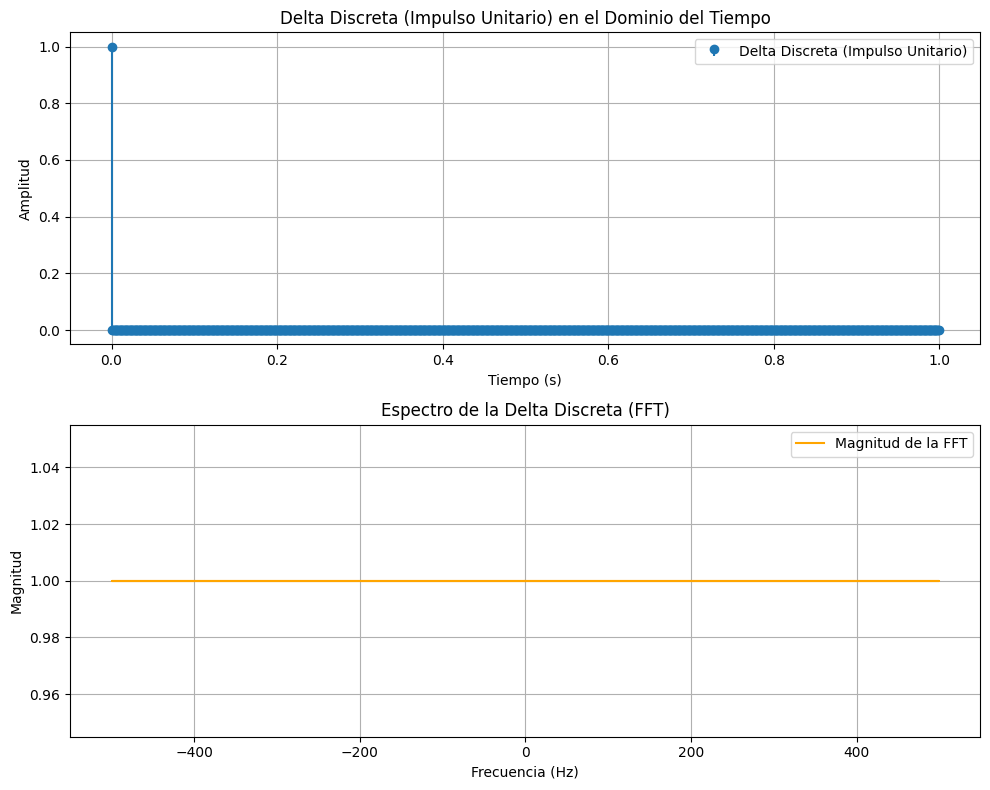

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
T = 1  # Duración en segundos
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Tiempo

# Generamos la delta discreta (impulso unitario)
delta_signal = np.zeros_like(t)
delta_signal[0] = 1  # Delta de Dirac en t = 0 (impulso unitario)

# Calculamos la FFT de la delta
delta_FFT = fft(delta_signal)
frequencies = fftfreq(len(t), 1/fs)

# Graficamos la delta y su espectro
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Graficamos la delta discreta en el dominio del tiempo
axs[0].stem(t, delta_signal, label="Delta Discreta (Impulso Unitario)", basefmt=" ")
axs[0].set_title("Delta Discreta (Impulso Unitario) en el Dominio del Tiempo")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].grid(True)
axs[0].legend()

# Graficamos el espectro de la FFT (frecuencia vs magnitud)
axs[1].plot(frequencies, np.abs(delta_FFT), label="Magnitud de la FFT", color='orange')
axs[1].set_title("Espectro de la Delta Discreta (FFT)")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


#### Representación de una ventana

## Ventanas

#### Funcionamiento de las ventanas



#### Tipos de ventanas
Las ventanas condicionan la forma en la que se representa la señal.

Existen diferentes tipos de ventanas:
- Ventana rectangular (boxcar)


- Ventana de Hamming

- Ventana de Hanning (Hann)

- Ventana de Blackman-Harris



Estas son las otras que hay:


    triang (Triangular)

    bartlett

    parzen

    bohman

    blackmanharris

    nuttall

    barthann

    flattop

    cosine

    general_gaussian

    slepian

    chebwin

    kaiser

    taylor

# Otros conceptos

## Señales interesantes


## Espectograma